# Confocal microscopy imaging of fixed zebrafish tailbuds labelled with six fluorophores.

*Instrument: Olympus FV 3000 Confocal laser scanning microscope*

*Author: Kane Toh*

*Last updated: 2020-03-11*


## Introduction

In multi-labelling experiments where the specimen of interest is tagged with multiple [fluorophores](./Basics_of_fluorescent_confocal_microscopy.ipynb), a significant challenge faced in image acquisition is the task of discriminating between the emitted signals. This stems from the fact that the emission spectra of different fluorophores have significant degrees of overlap. This phenomenon is called **spectral bleed-through** and creates artifacts in imaging (Figure 1). A target fluorophore signal is reported to be present although in actuality, the signal is emitted from another fluorophore which has passed through the filter set reserved for the target fluorophore. 

<img src="figure1_spectralOverlap.png">


*Figure 1: Emission spectra of the Alexa fluor 488 and 514 dyes.There is significant overlap in both distributions, starting from around 500 nm. A long-pass filter that transmits light above 488 nm would therefore capture the emitted signal from both dyes. Image created with the Bio-rad spectraviewer.*

### Approach 1: Bandpass filter bandwidth optimisation

One way to discriminate between fluorophores with overlapping emission spectra is to narrow the emission detection filter window such that signal spillover is minimal within the detection range. A [bandpass filter](./Basics_of_fluorescent_confocal_microscopy.ipynb##Filters), which is a type of optical filter, is suitable for this purpose as it has a defined cut-on and cut-off wavelength that sets the spectral detection window. In our case, the Olympus FV 3000 confocal microscope is equipped with a **tunable variable optical bandpass filter (VBF)**. Using the VBF provides us with additional versatility over conventional bandpass filters in that its spectral characteristics are not 'fixed'- we have the flexibility of dynamic wavelength tuning, that is, to independently adjust the filter centre wavelength and bandwidth to optimize image acquisition (Figure 2). 

<img src="figure2_vbfWindow.png">

*Figure 2: Emission spectra of the Alexa fluor 488 and 514 dyes captured with a VBF set at 548/8,  and excited with a 514 nm laser. In a sample with both Alexa fluor 488 and 514 dyes, if we set the VBF window to have a centre wavelength of 548 nm and bandwidth of 8 nm and illuminate the sample with a 514 nm laser, we should be able to minimize the acquisition of the Alexa fluor 488 emission signal and maximise the acquisition of the Alexa fluor 514 signal.  Image created with the Bio-rad spectraviewer.*

### Approach 2: Spectral imaging and linear unmixing.

A disadvantage of using filter sets is that we are only collecting a subset of the emitted light and discarding signal outside of the detection window. Instead, spectral imaging exploits the entire spectral profile of each fluorophore by discriminating between individual fluorophores based on their specific fluorescence emission distribution, a technique referred to as **emission fingerprinting**. To achieve this, the emitted light is dispersed into its component wavelengths and the resultant intensity at each narrow wavelength interval is measured. In spectral imaging, we can define the wavelength range and size of the bandwidth to generate a collection of images referred to as a **lambda stack**. This concept is illustrated in Figure 3. 
<img src="figure3_lambda.png" width="80%">

*Figure 3: Concept of a Lambda stack. (a) The emission spectra of the green, yellow and orange fluorescent proteins are depicted. The image was scanned sequentially from 480nm to 640nm in 10 nm steps, generating a total of $\frac{640-480}{10}$ $=$$\frac{160}{10} = 16$ 2D image slices. These 16 images, when concatenated in 3D, yields the lambda stack. (b) The three fluorophores will have different contributions to signal intensity captured at each wavelength interval. For example, at $\lambda3$, we observe that most of the signal comes from the EGFP protein, which is consistent with the emission spectra depicted in (a). Given knowledge of the reference spectra of these proteins, the mixed emission spectra can be linearly unmixed over the entire lambda stack to recover the individual fluorophore contribution. Image taken from https://www.microscopyu.com/techniques/confocal/spectral-imaging-and-linear-unmixing*


### Experimental technique 

Experimentally, the mRNA targets of interest were detected using the version 3 Hybridisation Chain Reaction (HCR) method (Figure 4). Briefly, the protocol involves two stages:

1. **Detection stage**

DNA probes are designed to be complementary to the mRNA targets of interest. These probes have an initiator sequence attached to them, which is necessary for their recognition by the hairpins (see **Amplification stage** below). 

2. **Amplification stage**

In the amplification stage, hairpins are designed to recognise the DNA probes via their initiator sequence. These hairpins come in pairs (labelled H1 and H2) and are conjugated to fluorophores. If a probe carries the appropriate initiator sequence, the hairpin can recognise and bind to it. As a result of binding, the hairpin will linearise and release a binding site for its counterpart. The counterpart hairpin will then bind to the exposed site, again exposing a binding site for its counterpart. Consequently, a non-enzymatically driven chain reaction occurs which leads to signal amplification.

As an aside, V3 HCR is an improved version of the V2 HCR protocol, in that each probe is split into 2. The purpose of this is to improve signal specificity via increasing the stringency of hairpin polymerisation: the hairpins will successfully polymerise only when both split probes are simultaneously present, as only then will both of the corresponding initiator sequences be present. 

<img src="figure4_HCRmtd.jpg" width="80%">


### Biological problem statement:

Biologically, we aim to quantify the degree of gene expression **heterogeneity** and **indeterminacy** in the population of **Neuromesodermal progenitors (NMps)** residing in the zebrafish tailbud. Molecularly, NMps co-express Sox2 and Tbxta which are regulators of the neural and mesodermal lineages respectively, although expression of both genes is not sufficient to identify these cells - other cells such as the hypochord cells also express both genes. 

Therefore, we examine the mRNA levels of Sox2 and Tbxta to identify cells co-expressing sox2 and tbxta and focus on cells residing spatially in the posterior wall of the zebrafish tailbud as this is where NMps are known to reside. We study these single cells in detail by examining the expression of other markers that were predicted from single-cell RNA sequencing data to be informative of the neural and mesodermal lineages.Specficially, we are interested in the population-level distribution of these markers in single cells (heterogeneity) and the proportion of NMps that co-express markers from both lineages (indeterminacy). 


### Technical problem statement:

Technically, we aim to effectively discriminate between the following 6 fluorophores in the zebrafish tailbud:

1. DAPI
2. Alexa fluor 488 
3. Alexa fluor 514 
4. Alexa fluor 546 
5. Alexa fluor 594 
6. Alexa fluor 647 


### Approach

To assess the accuracy of either method in the detection of the fluorescent signal, we performed HCR on genes with known expression profiles (obtained via *in situ hybridisation*).

We first compared the results with these reference images. This would provide us with a quick way to determine whether the method is accurate, as the broad domain of gene expression should coincide. 

Next, we compared the two methods against each other in their ability to distinguish the Alexa fluor 488 and Alexa fluor 514 emission signal in a 2D image plane. We chose to focus on these two dyes as their emission spectra overlap substantially, such that conventional confocal imaging setups incur spectral bleed-through artefacts. 

1. In the spectral imaging approach, we first perform a lambda scan to scan the sample across (?) at (?) intervals. Then, the signal was linearly unmixed using the reference emission spectra for Alexa fluor 488 and 514. We used the reference spectra as we observed that there was no substantial difference in the reference dye spectra and the context-specific spectra that was obtained directly from our samples. 

2. In the VBF approach, we narrowed the detection window for both emission spectras to capture regions where spectral bleedthrough was minimal. 

## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set(style="darkgrid")

import scipy.ndimage as ndi
from skimage.io import imread
from skimage import img_as_float

## Data

### Experimental method

The zebrafish tailbud was stained for 5 different mRNAs with the version 3 hybridisation chain reaction (V3 HCR). Briefly, DNA probes were designed to bind specifically to target mRNAs of interest via complementary base pairing. These probes also contain a recognition sequence that flank the complementary sequence. Hairpins, which are conjugated to a particular Alexa dye, can bind to the recognition sequence and initiate a polymerisation reaction that occurs in a non-enzymatic fashion. The hairpin polymerisation serves to amplify the signal. Before imaging, the tailbud was stained with DAPI which intercalates with nuclear DNA, thus serving to highlight the nucleus. 

See https://dev.biologists.org/content/145/12/dev165753 from Choi et al., (2018) for more details of the V3 HCR method. 

### Images

**lambda_488_514.tif**
* 2 channel, 16 bit, 2D image displaying signal from Alexa fluor 488 and 514 dytes obtained from lambda scanning and spectral deconvolution

**vbf_488_514.tif**
* 2 channel, 16 bit, 2D image displaying signal from Alexa fluor 488 and 514 dytes obtained from narrowing the detection window of the VBF


In [2]:
# Reading in the files
filename_lambda = 'images/lambda_488_514.tif'
filename_vbf = 'images/vbf_488_514.tif'
img_lambda = imread(filename_lambda)
img_vbf = imread(filename_vbf)

# Separating channels
img_lambda_488 = img_lambda[0,:,:]
img_lambda_514 = img_lambda[1,:,:]
img_vbf_488 = img_vbf[0,:,:]
img_vbf_514 = img_vbf[1,:,:]

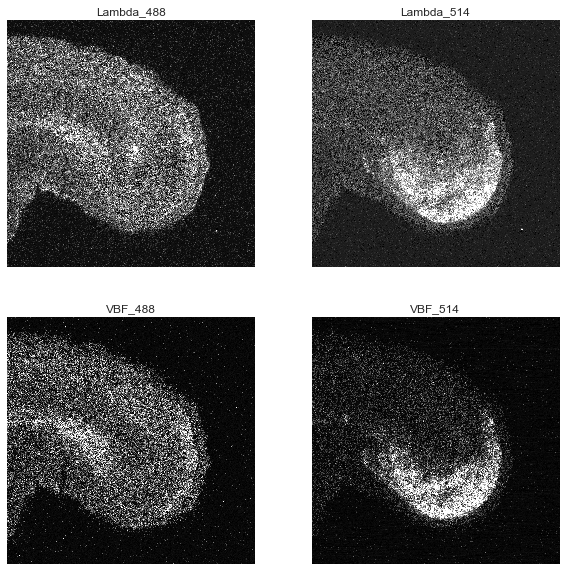

In [3]:
from skimage import exposure

def display_image(axis, img, cmap, title_name, setAxis = False):
    lwr_pct, upp_pct = np.percentile(img, (2, 98))
    adj_img = exposure.rescale_intensity(img, in_range = (lwr_pct, upp_pct), out_range = np.uint16) 
    axis.imshow(adj_img, cmap = cmap, interpolation = 'none')
    axis.set_title(title_name)
    if not setAxis:
        axis.set_axis_off()
    
fig, axes = plt.subplots(2,2, figsize = (10,10))
lambda_488, lambda_514, vbf_488, vbf_514 = axes.flatten()

display_image(lambda_488, img_lambda_488, "gray", "Lambda_488")
display_image(lambda_514, img_lambda_514, "gray", "Lambda_514")
display_image(vbf_488, img_vbf_488, "gray", "VBF_488")
display_image(vbf_514, img_vbf_514, "gray", "VBF_514")

plt.savefig('raw_lambda_vbf.png')

## Processing the image: analysing a region of interest 

In [4]:
from skimage import exposure
from skimage import filters 
from skimage.morphology import disk
from skimage.filters import threshold_otsu

def process_image(lwr_pct, upp_pct, img, rad, x_min, x_max, y_min, y_max):
    ### Contrast stretching to stretch histogram & also to span the uint16 dtype, followed by median filter with disk-shaped SEM to reduce bg.
    ### Image is then cropped to display ROI with signal for accurate Mander's overlap coeff and Pearson's R calc.
    lwr_pct, upp_pct = np.percentile(img, (lwr_pct, upp_pct))
    adj_img = exposure.rescale_intensity(img, in_range = (lwr_pct,upp_pct), out_range = np.uint16) 
    adj_img = filters.median(adj_img, disk(rad))
    adj_img = adj_img[x_min:x_max, y_min:y_max]
    raw_cropped = img[x_min:x_max, y_min:y_max]
    return adj_img, raw_cropped

# ROI for 488 channel
x_min_488 = 250
x_max_488 = 550
y_min_488 = 50
y_max_488 = 500

# ROI for 514 channel
x_min_514 = 400
x_max_514 = 700
y_min_514 = 300
y_max_514 = 750

adj_img_lambda_488, img_lambda_488_cropped_raw = process_image(2, 98, img_lambda_488, 4, x_min_488, x_max_488, y_min_488, y_max_488)
adj_img_lambda_514, img_lambda_514_cropped_raw  = process_image(2, 98, img_lambda_514, 4, x_min_514, x_max_514, y_min_514, y_max_514)
adj_img_vbf_488, img_vbf_488_cropped_raw = process_image(2, 98, img_vbf_488, 4, x_min_488, x_max_488, y_min_488, y_max_488)
adj_img_vbf_514, img_vbf_514_cropped_raw = process_image(2, 98, img_vbf_514, 4, x_min_514, x_max_514, y_min_514, y_max_514)


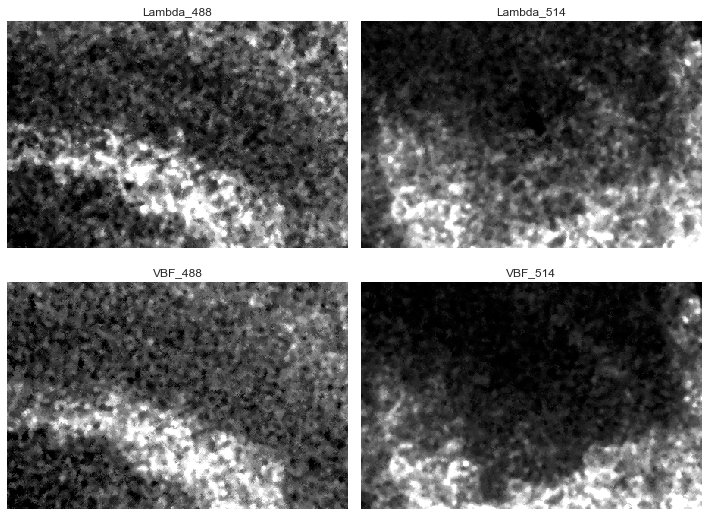

In [5]:
fig, axes = plt.subplots(2,2, figsize = (10,10))
lambda_488, lambda_514, vbf_488, vbf_514 = axes.flatten()

display_image(lambda_488, adj_img_lambda_488, "gray", "Lambda_488")
display_image(lambda_514, adj_img_lambda_514, "gray", "Lambda_514")
display_image(vbf_488, adj_img_vbf_488, "gray", "VBF_488")
display_image(vbf_514, adj_img_vbf_514, "gray", "VBF_514")

plt.tight_layout()
plt.subplots_adjust(top = 0.8)
plt.savefig('cropped_proc_lambda_vbf.png')

## Calculating Manders overlap coefficients (MOC)

M1_488 0.651306263770853
M2_488 0.8042599502487562
M1_514 0.7266647126222388
M2_514 0.8692506295222007


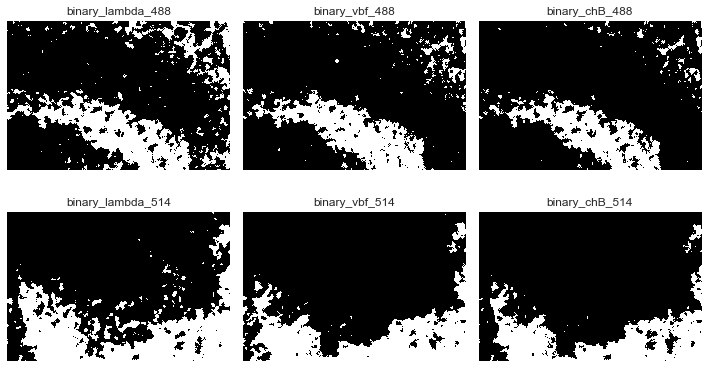

In [7]:
from skimage.filters import threshold_otsu

thr_lambda_488 = threshold_otsu(adj_img_lambda_488)
thr_vbf_488 = threshold_otsu(adj_img_vbf_488)
thr_lambda_514 = threshold_otsu(adj_img_lambda_514)
thr_vbf_514 = threshold_otsu(adj_img_vbf_514)

binary_lambda_488 = adj_img_lambda_488 > thr_lambda_488
binary_vbf_488 = adj_img_vbf_488 > thr_vbf_488
binary_chB_488 = binary_lambda_488 & binary_vbf_488

binary_lambda_514 = adj_img_lambda_514 > thr_lambda_514
binary_vbf_514 = adj_img_vbf_514 > thr_vbf_514
binary_chB_514 = binary_lambda_514 & binary_vbf_514

M1_488 = np.sum(binary_chB_488)/np.sum(binary_lambda_488)
M2_488 = np.sum(binary_chB_488)/np.sum(binary_vbf_488)
M1_514 = np.sum(binary_chB_514)/np.sum(binary_lambda_514)
M2_514 = np.sum(binary_chB_514)/np.sum(binary_vbf_514)

print("M1_488",M1_488)
print("M2_488",M2_488)
print("M1_514",M1_514)
print("M2_514",M2_514)

# Plotting thresholded images
fig, axes = plt.subplots(2,3, figsize=(10, 10))
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten() 

display_image(ax1, binary_lambda_488, "gray", "binary_lambda_488")
display_image(ax2, binary_vbf_488, "gray", "binary_vbf_488")
display_image(ax3, binary_chB_488, "gray", "binary_chB_488")
display_image(ax4, binary_lambda_514, "gray", "binary_lambda_514")
display_image(ax5, binary_vbf_514, "gray", "binary_vbf_514")
display_image(ax6, binary_chB_514, "gray", "binary_chB_514")

plt.tight_layout()
plt.subplots_adjust(top = 0.65)
plt.savefig('manders_lambda_vbf.png')



In [7]:
lambda_488_series = pd.Series(adj_img_lambda_488.reshape(adj_img_lambda_488.shape[0] * adj_img_lambda_488.shape[1]), name='lambda_488')
lambda_514_series = pd.Series(adj_img_lambda_514.reshape(adj_img_lambda_514.shape[0] * adj_img_lambda_514.shape[1]), name='lambda_514')
vbf_488_series = pd.Series(adj_img_vbf_488.reshape(adj_img_vbf_488.shape[0] * adj_img_vbf_488.shape[1]), name='vbf_488')
vbf_514_series = pd.Series(adj_img_vbf_514.reshape(adj_img_vbf_514.shape[0] * adj_img_vbf_514.shape[1]), name='vbf_514')

#display(lambda_488_series.shape == vbf_488_series.shape)
#display(lambda_514_series.shape == vbf_514_series.shape)

ch_488 = pd.concat([lambda_488_series, vbf_488_series], axis=1)
ch_514 = pd.concat([lambda_514_series, vbf_514_series], axis=1)

In [8]:
## Calculating Pearson's correlation coeffient

In [9]:
from scipy.stats.stats import pearsonr
a = pearsonr(ch_488.loc[:,'lambda_488'], ch_488.loc[:,'vbf_488'])
a = [np.round(c, 2) for c in a]

b = pearsonr(ch_514.loc[:,'lambda_514'], ch_514.loc[:,'vbf_514'])
b = [np.round(c, 2) for c in b]

#display(a)
#display(b)
#from scipy.stats import linregress
#linregress(ch_488.loc[:,'lambda_488'], ch_488.loc[:,'vbf_488'])


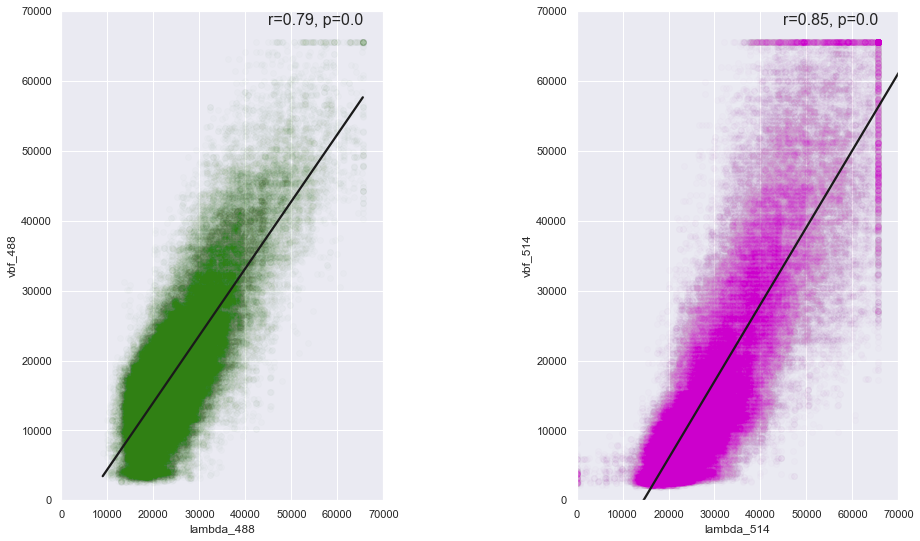

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize =(15,9))
plt.subplots_adjust(wspace = 0.6)
ax1.set_xlim(0,70000)
ax2.set_xlim(0,70000)
ax1.set_ylim(0,70000)
ax2.set_ylim(0,70000)

sns.set_style("whitegrid")
sns.regplot(x='lambda_488', y='vbf_488',
            ci=None, data=ch_488, fit_reg=True, ax = ax1,
            scatter_kws={'alpha':0.01, 'color':"#308014"}, line_kws = {'color' : 'k'} ,truncate = True)

sns.regplot(x='lambda_514', y='vbf_514',
            ci=None, data=ch_514, fit_reg=True, ax = ax2,
            scatter_kws={'alpha':0.01, 'color':"#cc00cc"}, line_kws = {'color' : 'k'} ,truncate = False)

#sns.scatterplot("lambda_488", "vbf_488", data = ch_488, ax=ax1, alpha= 0.3, facecolor="#308014", s = 30)
#sns.scatterplot("lambda_514", "vbf_514", data = ch_514, ax=ax2, alpha= 0.3, facecolor="#cc00cc", s = 30)

text1 = 'r=%s, p=%s' % (a[0], a[1])
text2 = 'r=%s, p=%s' % (b[0], b[1])

ax1.text(45000, 68000, text1, fontsize=16)
ax2.text(45000, 68000, text2, fontsize=16)

plt.savefig("sctplots.png")

## Comparing distribution of pixel intensities in cropped background region

In [11]:
# Cropping bg for both 488 and 514 image

# ROI for 488 channel
x_min_488 = 500
x_max_488 = 700
y_min_488 = 0
y_max_488 = 200

# ROI for 514 channel
x_min_514 = 200
x_max_514 = 400
y_min_514 = 400
y_max_514 = 600

_, bg_lambda_488_cropped_raw = process_image(2, 98, img_lambda_488, 4, x_min_488, x_max_488, y_min_488, y_max_488)
_, bg_lambda_514_cropped_raw  = process_image(2, 98, img_lambda_514, 4, x_min_514, x_max_514, y_min_514, y_max_514)
_, bg_vbf_488_cropped_raw = process_image(2, 98, img_vbf_488, 4, x_min_488, x_max_488, y_min_488, y_max_488)
_, bg_vbf_514_cropped_raw = process_image(2, 98, img_vbf_514, 4, x_min_514, x_max_514, y_min_514, y_max_514)

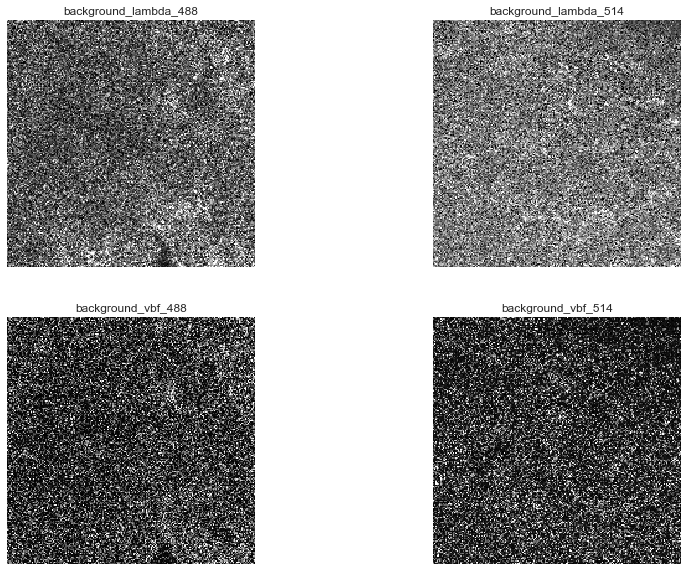

In [12]:
fig, axes = plt.subplots(2,2, figsize=(14, 10))
ax1, ax2, ax3, ax4 = axes.flatten() 

display_image(ax1, bg_lambda_488_cropped_raw, "gray", "background_lambda_488")
display_image(ax2, bg_lambda_514_cropped_raw, "gray", "background_lambda_514")
display_image(ax3, bg_vbf_488_cropped_raw, "gray", "background_vbf_488")
display_image(ax4, bg_vbf_514_cropped_raw, "gray", "background_vbf_514")

plt.savefig("bg_comparison.png")

In [13]:
lambda_488_series = pd.Series(bg_lambda_488_cropped_raw.reshape(bg_lambda_488_cropped_raw.shape[0] * bg_lambda_488_cropped_raw.shape[1]), name='bg_lambda_488')
lambda_514_series = pd.Series(bg_lambda_514_cropped_raw.reshape(bg_lambda_514_cropped_raw.shape[0] * bg_lambda_514_cropped_raw.shape[1]), name='bg_lambda_514')
vbf_488_series = pd.Series(bg_vbf_488_cropped_raw.reshape(bg_vbf_488_cropped_raw.shape[0] * bg_vbf_488_cropped_raw.shape[1]), name='bg_vbf_488')
vbf_514_series = pd.Series(bg_vbf_514_cropped_raw.reshape(bg_vbf_514_cropped_raw.shape[0] * bg_vbf_514_cropped_raw.shape[1]), name='bg_vbf_514')

#display(lambda_488_series.shape == vbf_488_series.shape)
#display(lambda_514_series.shape == vbf_514_series.shape)

df = pd.concat([lambda_488_series, vbf_488_series, lambda_514_series, vbf_514_series], axis=1)
df["id"] = df.index
df = pd.melt(df, id_vars=['id'],var_name='class', value_name='intensity')

## Analysis of background intensity distributions:

Comparing the Alexa fluor 488 background intensities:
* Slightly higher mean intensity value for the VBF channel although the interquartile range is smaller, indicating a lower dispersion 

Comparing the Alexa fluor 514 background intensities:
    
* Lower mean intensity value for the VBF channel with smaller interquartile range. Based on the differences in background pixel intensity distribution, the VBF method appears to yield less background noise in comparison with the spectral imaging method.

# Conclusion

Given the following points when comparing the VBF method to spectral imaging:
1. Significant reduction in imaging acquisition time (by ?) 
2. Relatively high concordance (MOC and Pearson's r) in signal intensities from both methods
3. Less noisy images, at least for the 514 channel

We conclude that we will proceed our analyses using the VBF approach. 

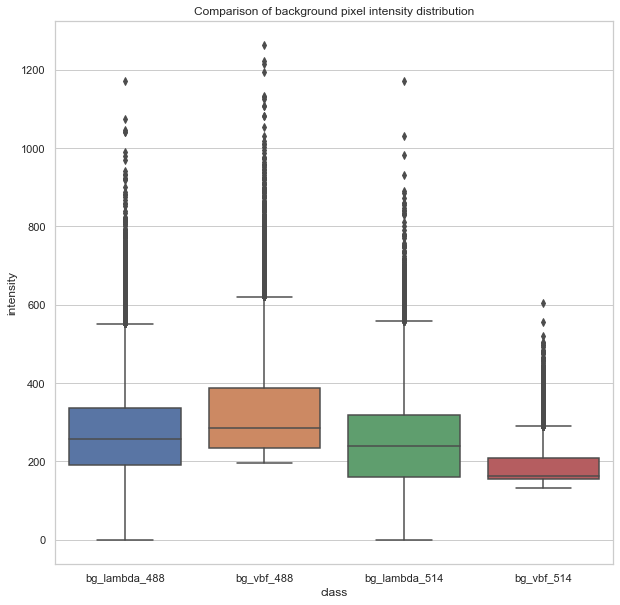

In [14]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'class', y = 'intensity', data = df, ax=ax).set_title('Comparison of background pixel intensity distribution')
#sns.swarmplot(x="class", y="intensity", data=df, color=".25", ax = ax)
plt.savefig("bg_boxplots.png")